# Hypothesis 1:

$H_{0}$: The network latency has gone down or stayed the same since switching providers

$H_{a}$: The network latency has increased since sqitching providers
- True Pos.: Latency has NOT gone down or stayed the same, went with alternate hypthesis
- True Neg.: Latency has NOT gone up, went with null
- Error T1: Latency has gone down or stayed the same, went with alternate
- Error T2: Latency has gone up, went with null

# Hypothesis 2:

$H_{0}$: The website redesign is the same quality or worse than it was before.

$H_{a}$: The website redesign is good
- True Pos.: The website redesign is NOT the same quality or worse than it was before, went with alternate hypthesis
- True Neg.: The website redesign is NOT good, went with null
- Error T1: The website redisgn IS the same quality or worse than it was before, went with alternate
- Error T2: The website redesign IS good, went with null

# Hypothesis 3:

$H_{0}$: The televison ad is not affecting or is lowering sales.

$H_{a}$: The television ad is increasing sales.
- True Pos.: The televison ad IS affecting or is NOT lowering sales, went with alternate hypthesis
- True Neg.: The television ad is NOT increasing sales, went with null
- Error T1: The televison ad is NOT affecting or IS lowering sales, went with alternate
- Error T2: The television ad IS increasing sales, went with null

## Question 1
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data
alpha = .05

In [13]:
u1 = 90
s1 = 15
n1 = 40

u2 = 100
s2 = 20
n2 = 50
t, p =stats.ttest_ind_from_stats(u1, s1, n1, u2, s2, n2, equal_var = False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [14]:
if p < alpha:
    print('H_0 is not rejected')

H_0 is not rejected


$H_{0}$ accepted

## Question 2
### Load the `mpg` dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [15]:
mpg = data('mpg')
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)

In [16]:
fe08 = mpg[mpg.year == 2008].hwy + mpg[mpg.year == 2008].cty
fe99 = mpg[mpg.year == 1999].hwy + mpg[mpg.year == 1999].cty

varience = fe99.var(), fe08.var()
varience

(108.49042145593873, 96.38992042440319)

In [17]:
t, p = stats.ttest_ind(fe08, fe99, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [18]:
p < alpha

False

#### Analysis
We fail to reject $H_{0}$ as the p is greater than alpha.

### Are compact cars more fuel-efficient than the average car?

In [19]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

<AxesSubplot:>

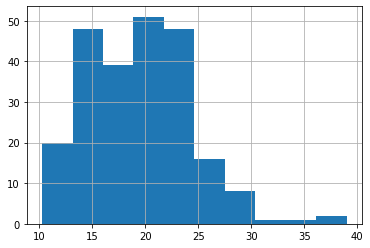

In [20]:
mpg.avg_fe.hist()

<AxesSubplot:>

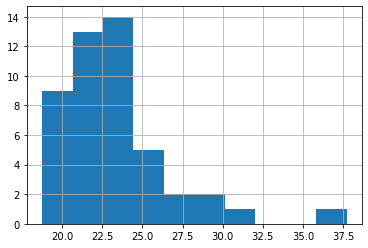

In [21]:
fe_compact.hist()

In [22]:
mpg.avg_fe.var()

24.106173930122633

In [23]:
fe_compact.var()

12.763933193960233

In [24]:
t, p = stats.ttest_1samp(fe_compact, μ)
#t, p = stats.mannwhitneyu(fe_compact, mpg.avg_fe)
t, p/2

(7.512360093161354, 7.808833174403864e-10)

In [25]:
p/2 < alpha

True

#### Analysis
We reject $H_{0}$ as the p is less than alpha.

Additionally, as this is a single-tailed question, the t being greater than 0 indicates that $H_{a}$ is also correct.

### Do manual cars get better gas mileage than automatic cars?

In [26]:
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe
fe_automatic = mpg[mpg.trans.str.contains('auto')].avg_fe

In [27]:
variance = fe_manual.var(), fe_automatic.var()
variance

(25.665633639828275, 20.428279095002054)

In [28]:
t, p = stats.ttest_ind(fe_manual, fe_automatic, equal_var = False)
t, p/2

(4.47444321386703, 7.99035135103976e-06)

In [29]:
p < alpha

True

#### Analysis
We fail to reject $H_{0}$ as the p is less than alpha.

Additionally, as this is a single-tailed question, the t being greater than 0 indicates that $H_{a}$ is also correct.

# Correlation

In [30]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df = pd.read_csv(url, index_col="id")
df.head(4).T

id,0,1,2,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF
gender,Female,Male,Male,Male
is_senior_citizen,0,0,0,1
partner,Yes,No,No,Yes
dependents,Yes,No,No,No
phone_service,1,2,1,1
internet_service,1,1,2,2
contract_int,1,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check
monthly_charges,65.6,59.9,73.9,98.0


### Does tenure correlate with monthly charges?

In [31]:
x = df.tenure_month
y = df.monthly_charges
n = df.shape[0]

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.2460222267886157

In [32]:
corr, p = stats.pearsonr(x, y)
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

correlation_test(x, y)

(0.2460222267886157,
 1.8834273042643495e-97,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

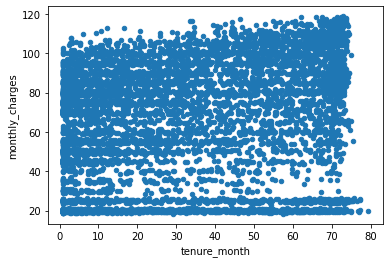

In [33]:
df.plot.scatter('tenure_month', 'monthly_charges')

In [34]:
x.var(), y.var()

(604.1028931291916, 906.1263207023961)

### Does tenure correlate with total charges?

In [35]:
y = df.total_charges

In [36]:
correlation_test(x, y)

(0.8257328669183063,
 0.0,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

### What happens if you control for phone and internet service?

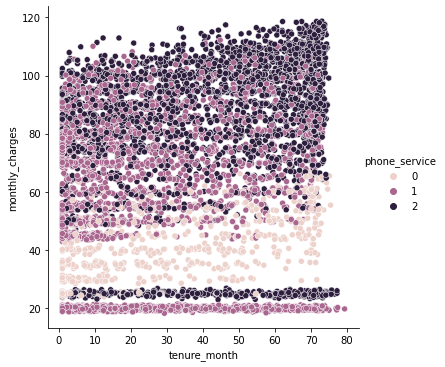

In [37]:
sns.relplot(x='tenure_month', y='monthly_charges', hue='phone_service', data=df)

In [38]:
phone_cust = df[df.phone_service != 0]
non_phone = df[df.phone_service == 0]
internet_cust = df[df.internet_service != 0]
no_internet = df[df.internet_service == 0]

In [39]:
x = phone_cust.tenure_month
y = phone_cust.monthly_charges

correlation_test(x, y)

(0.24296622457649775,
 5.166669584733289e-86,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

In [40]:
x = non_phone.tenure_month
y = non_phone.monthly_charges

correlation_test(x, y)

(0.5917977775067608,
 1.736039279054742e-65,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

In [41]:
x = internet_cust.tenure_month
y = internet_cust.monthly_charges

correlation_test(x, y)

(0.372853218267153,
 2.69748010351858e-181,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

In [42]:
x = no_internet.tenure_month
y = no_internet.monthly_charges

correlation_test(x, y)

(0.3463841149423964,
 3.8275378977119957e-44,
 'reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation.')

### Question 2

In [43]:
from env import host, user, password
def get_db_url(host = host, user = user, password = password, db = 'employees'):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [44]:
sql = """
select datediff(curdate(), hire_date) as days_on_job, salary
from employees
join salaries using(emp_no)
where to_date > curdate();
"""
df = pd.read_sql(sql, get_db_url())
df.head(5)

,days_on_job,salary
0,12830,88958
1,13047,72527
2,12767,43311
3,12672,74057
4,11656,94692


<AxesSubplot:xlabel='days_on_job', ylabel='salary'>

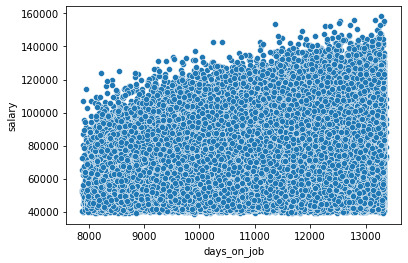

In [45]:
sns.scatterplot(x="days_on_job", y="salary", data=df)

In [46]:
corr, p = stats.pearsonr(df.days_on_job, df.salary)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation


(0.30646256131860783, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [47]:
sql = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""
df = pd.read_sql(sql, get_db_url())
df.head()

,emp_no,title_count,days_on_job
0,10001,1,12830
1,10002,1,13047
2,10003,1,12767
3,10004,2,12672
4,10005,2,11656


In [48]:
corr, p = stats.pearsonr(df.days_on_job, df.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p


We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.266598929913662, 0.0)

# Chi Squared

&nbsp;| Codeup Student | Not Codeup Student |&nbsp;
:- | :- | :- | :-
Uses a Macbook|	49|	20 | 69
Doesn't Use A Macbook|	1|	30 | 31
&nbsp; | 50 | 50 | 100

In [65]:
data = [{'uses_macbook': True, 'is_codeup_student': True,  }] * 49
data.extend([{'uses_macbook': False, 'is_codeup_student': True}])
data.extend([{'uses_macbook': True, 'is_codeup_student': False}] * 20)
data.extend([{'uses_macbook': False, 'is_codeup_student': False}] * 30)

df = pd.DataFrame(data)
df.head()

,uses_macbook,is_codeup_student
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [67]:
observed = pd.crosstab(df.is_codeup_student, df.uses_macbook)
observed

uses_macbook,False,True
is_codeup_student,,
False,30,20
True,1,49


In [68]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [69]:
expected

array([[15.5, 34.5],
       [15.5, 34.5]])

In [71]:
p < alpha

True

Since the p value is less than alpha, we can say they are dependent on each other

### Choose another 2 categorical variables from the `mpg` dataset and perform a 
$Chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [70]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,auto


In [52]:
mpg['transmission'] = mpg.trans.str[:-4]

In [53]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
avg_fe          78
transmission     2
dtype: int64

### Hypotheses
- $H_{0}$ `transmission` and `drv` are independent of one another
- $H_{a}$ `transmission` and `drv` are dependent on one another

In [57]:
observed = pd.crosstab(mpg.drv, mpg.transmission)
observed

transmission,auto,manual
drv,,
4,75,28
f,65,41
r,17,8


In [58]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [59]:
p < alpha

False

In [60]:
p

0.20838152534979626

In [61]:
expected

array([[69.10683761, 33.89316239],
       [71.11965812, 34.88034188],
       [16.77350427,  8.22649573]])

There is no association between these two, they are independent.

### Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
sql = '''
SELECT 
    e.emp_no,
    de.dept_no,
    
'''